# Hands-on : Classification

In this hands on activity you will learn how to develop an end to end ML based classification.
project. We will work with the iris flower dataset. The dataset contains features of a particular flower and the task is to classify it into one of the flower species namely Iris setosa, Iris virginica and Iris versicolor 

The dataset filename is `iris.data.csv`

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica



## 1. Load the necessary libraries

In [9]:
# Fill in with your code
import pandas as pd

## 2. Load the dataset

In [16]:
# Fill in with your code

df = pd.read_csv("../data/iris.data.csv")
print(df.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [18]:
df = pd.read_csv('../data/iris.data.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df = pd.read_csv('../data/iris.data.csv', header=None, 
                 names = ["sepal-length", "sepal-width", "petal-length", "petal-width","class"])
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Summarize the dataset

In [25]:
# Fill in with your code
df.shape

(150, 5)

In [36]:
df.ndim

2

The dataset contains 150 instances and 5 attributes

In [37]:
# Fill in with your code
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The first 20 instances in the data

In [29]:
# Fill in with your code
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
#lihat tipe data
df.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

Statistical descriptions of the data

In [55]:
# Fill in with your code
df.groupby("class")["class"].count()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Distribution of the class/label in the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000087A78C978>,
      dtype=object)

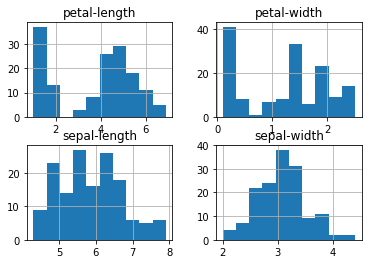

In [58]:
# Fill in with your code
df.hist()

## 4. Create a train test split

In [95]:
# Fill in with your code
from sklearn.model_selection import train_test_split
#X,y = df[(:,:-1)],df[(:,-1:)]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [97]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [98]:
seed = 7
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=test_size, random_state=seed)

In [114]:
X_train.head()

,sepal-length,sepal-width,petal-length,petal-width
126,6.2,2.8,4.8,1.8
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3


In [115]:
X_test.head()

,sepal-length,sepal-width,petal-length,petal-width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


In [116]:
Y_train.head()

126     Iris-virginica
79     Iris-versicolor
22         Iris-setosa
139     Iris-virginica
74     Iris-versicolor
Name: class, dtype: object

In [117]:
Y_test.head()

149     Iris-virginica
84     Iris-versicolor
40         Iris-setosa
66     Iris-versicolor
106     Iris-virginica
Name: class, dtype: object

## 5. Cross Validation

Try using any classifier you like e.g. Logistic Regression then print the average precision and also the precision, recall, and F1 for each label

In [100]:
# Fill in with your code
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict

In [106]:
seed = 7
num_folds = 5
k_fold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
predicted = cross_val_predict(model, X_train, Y_train, cv=k_fold)
print("Accuracy : %.3f "%(metrics.accuracy_score(Y_train, predicted)*100))


Accuracy : 96.667 


In [107]:
from sklearn.metrics import classification_report
report = classification_report(Y_train, predicted)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       1.00      0.89      0.94        38
 Iris-virginica       0.91      1.00      0.95        39

    avg / total       0.97      0.97      0.97       120



## 6. Evaluate performance on the test set

Now we have performed the cross validation, we can build the model on all training data and then test it on unseen data. Print the confusion matrix and also the classification report

In [108]:
# Fill in with your code
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
# save model
from pickle import dump
from pickle import load

file_name = "final_model.sav"
dump(model, open(file_name, "wb"))

In [110]:
# load model
loaded_model = load(open(file_name, "rb"))

In [120]:
# Inference/prediction

predicted = loaded_model.predict(X_test)
metrics.precision_score(Y_test, predicted, average="weighted")

0.8277777777777777

In [121]:
report = classification_report(Y_test, predicted)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



## What if you want to compare several models? How would you change your code